# Lending Loan Case Study

**Problem Statement:**
Able to identify risky loan applicants, such loans can be reduced thereby cutting down the amount of credit loss.
Risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as 
1. Denying the loan
2. Reducing the amount of loan,     
3. Lending (to risky applicants) at a higher interest rate, etc.




In [54]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.set_option('display.max_colwidth',20)
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)

# float 2 digit decimal
pd.options.display.float_format = '{:.2f}'.format

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
#read the dataset and check the first and last 2 rows
df = pd.read_csv("C:/Users/Akshara/Downloads/loan/loan.csv")
df.head(2).append(df.tail(2))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingc...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingc...,Borrower added...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingc...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.00,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.00,Not Verified,Jun-07,Fully Paid,n,https://lendingc...,I plan to consol...,debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,11.00,0.00,7,0,4175,51.50%,8,f,0.00,0.00,9195.26,980.83,7500.00,1695.26,0.00,0.00,0.00,Jun-10,256.59,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#read the dictionary dataset and check the first and last 3 rows
dictdf = pd.read_excel('C:/Users/Akshara/Downloads/loan/Data_Dictionary.xlsx')
dictdf.head(3).append(dictdf.tail(3))

,LoanStatNew,Description
0,acc_now_delinq,The number of ac...
1,acc_open_past_24...,Number of trades...
2,addr_state,The state provid...
114,zip_code,The first 3 numb...
115,NaN,NaN
116,NaN,* Employer Title...


In [57]:
#Check the  dataframe details
print(df.shape)
print(df.info())
print(df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                          

## Data Handling and Cleaning

No __missing values__ or __incorrect data types__ before we proceed to the analysis stage

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

### Missing Value Treatment

In [58]:
#Check the number of null values in the columns
df.isnull().sum()


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [59]:
#Drop coulmns if all values are null
df = df.dropna(how='all', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [60]:
# Drop the columns which has customer behaviour and will not be available for new customers. There is no point of analysing those column where data will not be available for new customers

df = df.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d'], axis = 1)

In [61]:
# drop columns, if all values on coulmn is same.
for col in df.columns:
    if (df[col] == df[col][0]).all():
        print("Equal ", col)
    else:
        print("Not equal ", col)

Not equal  id
Not equal  member_id
Not equal  loan_amnt
Not equal  funded_amnt
Not equal  funded_amnt_inv
Not equal  term
Not equal  int_rate
Not equal  installment
Not equal  grade
Not equal  sub_grade
Not equal  emp_title
Not equal  emp_length
Not equal  home_ownership
Not equal  annual_inc
Not equal  verification_status
Not equal  issue_d
Not equal  loan_status
Equal  pymnt_plan
Not equal  url
Not equal  desc
Not equal  purpose
Not equal  title
Not equal  zip_code
Not equal  addr_state
Not equal  dti
Not equal  mths_since_last_delinq
Not equal  mths_since_last_record
Equal  initial_list_status
Not equal  collections_12_mths_ex_med
Equal  policy_code
Equal  application_type
Equal  acc_now_delinq
Not equal  chargeoff_within_12_mths
Equal  delinq_amnt
Not equal  pub_rec_bankruptcies
Not equal  tax_liens


In [62]:
# drop columns, if all values on coulmn is same.
df = df.drop(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'], axis = 1)



In [63]:
#Identify category columns 

for col in df.columns:
    print("=====================================")
    print(col)
    print(df[col].value_counts())

id
1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64
member_id
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64
loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64
funded_amnt_inv
5000.00     1309
10000.00    1275
6000.00     1200
12000.00    1069
8000.00      900
            ... 
4944.21        1
18400.28       1
14659.82       1
6294.15        1
11808.92     

In [64]:
# Below column has NA and 0 which will not be useful for analysis
df = df.drop(['collections_12_mths_ex_med', 'tax_liens', 'chargeoff_within_12_mths'], axis = 1)

# removing desc column as NLP is not part of this project.
df = df.drop(['desc'], axis = 1)

# removing url column .
df = df.drop(['url'], axis = 1)

#Listing category columns
category_col = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'pub_rec_bankruptcies']


### Correcting Incorrect Data Types

In [65]:
# Remove months string from terms

df['term'] = df['term'].str.replace(" months", "").astype(int)
print(df['term'].value_counts())
print(df['term'])

36    29096
60    10621
Name: term, dtype: int64
0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int32


In [66]:
# Remove %  from int rates
df['int_rate'].head(10)
df['int_rate'] = df['int_rate'].str.replace("%", "").astype(float)
print(df['int_rate'].value_counts())

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64


In [67]:
# Remove all special char from emp_length  

To_remove_lst = [' years', ' year', '<', '>', '+', 's', ' ']
df['emp_length'] = df['emp_length'].str.replace('|'.join(map(re.escape, To_remove_lst)), '')


### Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [68]:
#  Replacing emp length NA or empty with 0 / mean value
df['emp_length'].replace(r'^\s*$', np.nan, regex=True)
#df['emp_length'].mean(axis=0, skipna=True)
df['emp_length'].fillna('0',inplace=True)
print(df['emp_length'].isna().sum())
pd.to_numeric(df['emp_length'])


0


0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: int64

In [69]:
# Replace home_ownership None value with Others

df['home_ownership'] = df['home_ownership'].replace("NONE", "OTHER", regex=True)
df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

In [70]:
# Replace verification_status "source verified" value with verified
df['verification_status'] = df['verification_status'].replace("Source Verified", "Verified", regex=True)
df['verification_status'].value_counts()

Verified        22796
Not Verified    16921
Name: verification_status, dtype: int64

### Dropping ROWs

In [71]:
# dropping off current loan status as this is will not add value. Interested on charged off and fully paid loans.
df.drop(index=df[df['loan_status']=='Current'].index,inplace=True)

In [72]:
# check id and member Id are unique. to confirm, all rows are unique.
for col in df:
    print(col, df[col].nunique(), df[col].count())
# Observation: there is no duplicate rows because id and member_id rows as same as no of rows.

id 38577 38577
member_id 38577 38577
loan_amnt 870 38577
funded_amnt 1019 38577
funded_amnt_inv 8050 38577
term 2 38577
int_rate 370 38577
installment 15022 38577
grade 7 38577
sub_grade 35 38577
emp_title 28027 36191
emp_length 11 38577
home_ownership 4 38577
annual_inc 5215 38577
verification_status 2 38577
issue_d 55 38577
loan_status 2 38577
purpose 14 38577
title 19297 38566
zip_code 822 38577
addr_state 50 38577
dti 2853 38577
mths_since_last_delinq 95 13672
mths_since_last_record 111 2740
pub_rec_bankruptcies 3 37880


In [73]:
# How many rows has missing NA or null
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())
# Observation: There are no empty rows in dataset.

Number of empty Rows:
0


In [74]:
df.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,13672.00,2740.00,37880.00
mean,676378.71,842284.34,11047.03,10784.06,10222.48,41.90,11.93,322.47,68777.97,13.27,35.88,69.26,0.04
std,209263.90,264451.93,7348.44,7090.31,7022.72,10.33,3.69,208.64,64218.68,6.67,22.03,43.99,0.20
min,54734.00,70699.00,500.00,500.00,0.00,36.00,5.42,15.69,4000.00,0.00,0.00,0.00,0.00
25%,512033.00,661131.00,5300.00,5200.00,5000.00,36.00,8.94,165.74,40000.00,8.13,18.00,19.75,0.00
50%,656423.00,839292.00,9600.00,9550.00,8733.44,36.00,11.71,277.86,58868.00,13.37,34.00,90.00,0.00
75%,829146.00,1037336.00,15000.00,15000.00,14000.00,36.00,14.38,425.55,82000.00,18.56,52.00,104.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,60.00,24.40,1305.19,6000000.00,29.99,120.00,129.00,2.00


## Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- All numeric should be positive. Replace any nagative with 0 for 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment', 'annual_inc',  'dti', 'mths_since_last_delinq', 'mths_since_last_record','pub_rec_bankruptcies'

In [75]:
# Identify all numerical values and make sure no negative values
df.dtypes
df.columns
numeric_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'annual_inc',  'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec_bankruptcies']
df.dtypes

for col in numeric_columns:
    df[col] = np.where(df[col] < 0, 0, df[col])
    
    
# Observation: all are positive integers

### Derived Column

In [76]:
#split month and year from issue_d and add as new column in data frame.
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

category_col.append('year')
category_col.append('month')


## Uni variate Analysis

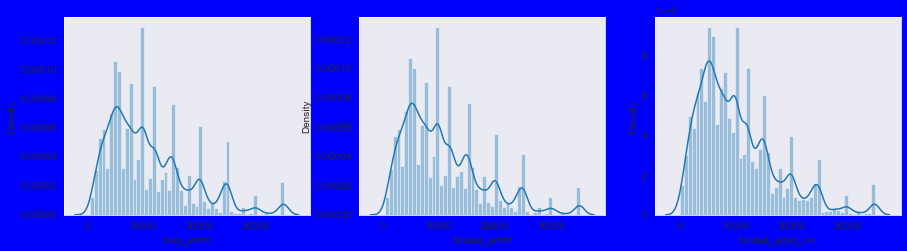

In [77]:
plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 3, 1)
sns.distplot(df['loan_amnt'])
plt.subplot(2, 3, 2)
sns.distplot(df['funded_amnt'])
plt.subplot(2, 3, 3)
sns.distplot(df['funded_amnt_inv'])
plt.show()

#### Observation: Distribution of loan_amnt , funded_amnt and funded_amnt_inv looks similar.

### Outliers Analysis Using Boxplot

Identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. 


### Boxplot

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.


loan_amnt


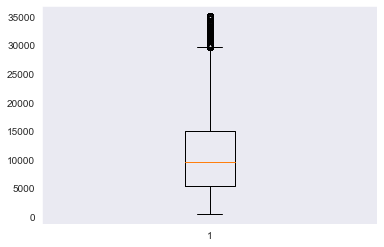

0.10    3090.00
0.50    9600.00
0.75   15000.00
0.90   21600.00
0.95   25000.00
0.97   28000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64
funded_amnt


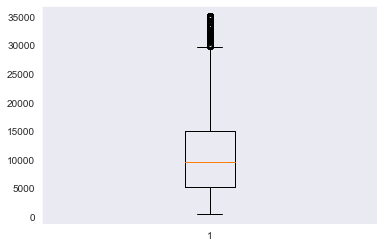

0.10    3000.00
0.50    9550.00
0.75   15000.00
0.90   20000.00
0.95   25000.00
0.97   27000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: funded_amnt, dtype: float64
funded_amnt_inv


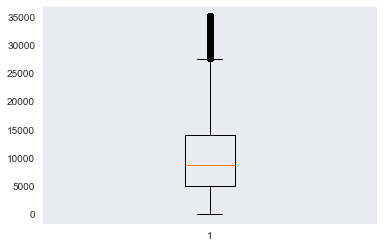

0.10    2825.00
0.50    8733.44
0.75   14000.00
0.90   19975.00
0.95   24500.07
0.97   25750.00
0.98   29879.26
0.99   34715.01
1.00   35000.00
Name: funded_amnt_inv, dtype: float64
int_rate


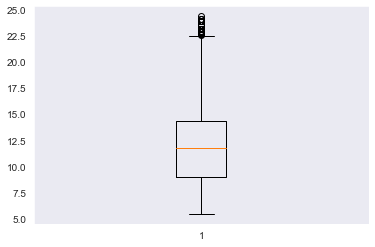

0.10    7.14
0.50   11.71
0.75   14.38
0.90   16.82
0.95   18.31
0.97   19.29
0.98   19.91
0.99   20.99
1.00   24.40
Name: int_rate, dtype: float64
installment


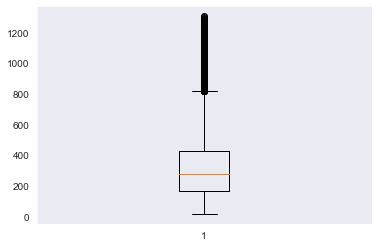

0.10     98.99
0.50    277.86
0.75    425.55
0.90    620.90
0.95    760.82
0.97    830.84
0.98    870.39
0.99    931.09
1.00   1305.19
Name: installment, dtype: float64
annual_inc


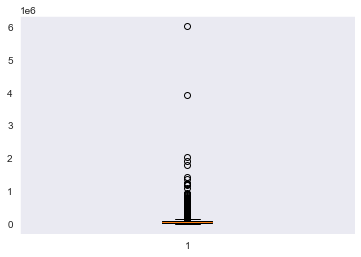

0.10     30000.00
0.50     58868.00
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234144.00
1.00   6000000.00
Name: annual_inc, dtype: float64
dti


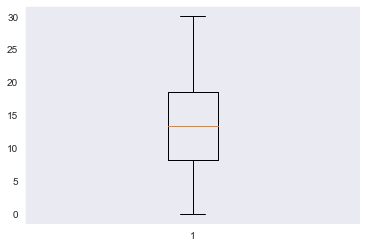

0.10    4.06
0.50   13.37
0.75   18.56
0.90   22.29
0.95   23.80
0.97   24.51
0.98   24.85
0.99   26.53
1.00   29.99
Name: dti, dtype: float64


In [78]:
#analysed outliers exercise for below numeric values.
cont_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'int_rate', 'installment', 'annual_inc',  'dti']
#Create a box plot for numeric columns
for col in cont_columns:
    print(col)
    plt.boxplot(df[col])
    plt.show()
    quantile =df[col].quantile([0.1, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1.0])
    print(quantile)
  

#### Observation: All numeric data has been distributed well except annual_inc. So removing outlier on annual_inc.

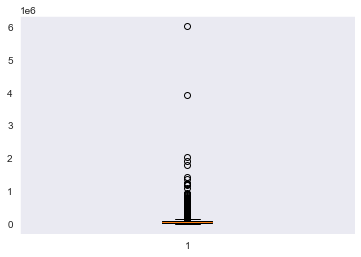

(3999.999, 30000.0]       4551
(30000.0, 58868.0]       14738
(58868.0, 82000.0]        9700
(82000.0, 115000.0]       5734
(115000.0, 140004.0]      1931
(140004.0, 165000.0]       775
(165000.0, 187000.0]       378
(187000.0, 234144.0]       384
(234144.0, 6000000.0]      386
Name: annual_inc, dtype: int64

In [79]:
#Create a box plot for the loan_amnt column
plt.boxplot(df['annual_inc'])
plt.show()
df['annual_inc'].value_counts()
pd.qcut(df['annual_inc'], q=[0, 0.1, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1.0]).value_counts(sort=False)

In [80]:
quantile =df['annual_inc'].quantile([0.1, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1.0])
quantile

0.10     30000.00
0.50     58868.00
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234144.00
1.00   6000000.00
Name: annual_inc, dtype: float64

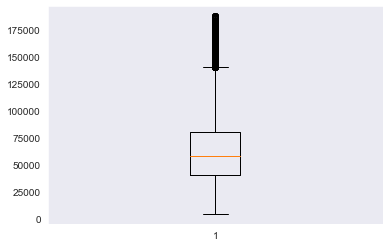

(3999.999, 30000.0]      4551
(30000.0, 57600.0]      14370
(57600.0, 80000.0]       9661
(80000.0, 110000.0]      5744
(110000.0, 129000.0]     1599
(129000.0, 141492.0]      747
(141492.0, 150000.0]      419
(150000.0, 165000.0]      338
(165000.0, 187000.0]      378
Name: annual_inc, dtype: int64

In [81]:
# will keep till 98 percentile

df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.98)]
plt.boxplot(df['annual_inc'])
plt.show()
pd.qcut(df['annual_inc'], q=[0, 0.1, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1.0]).value_counts(sort=False)
# annual_inc outliers exclusion is done.

#### Continuous data observation:
1. Most of the Loan amounts are between 5000 - 15000
2. Most of the funded amount are between 5000 - 15000
3. Most of the  interest rates between 8 to 14%
4. Most of the installments are between 200 - 400
5. Most of the DTI are between 12-18
6. Most of the Annual income is in the range of 30,000 and 60,000

## Data Visualisation

In [82]:
# Import Library

import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

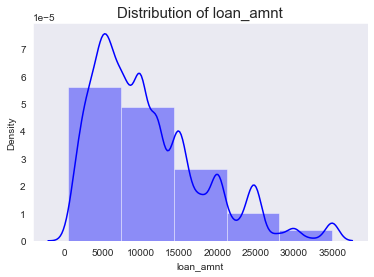

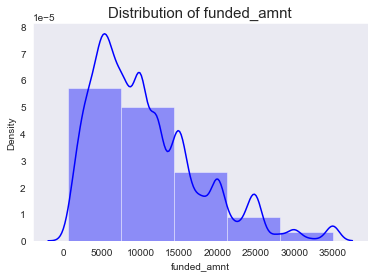

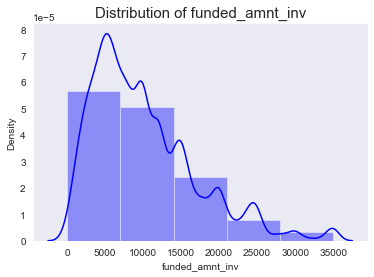

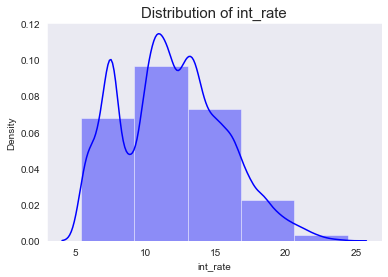

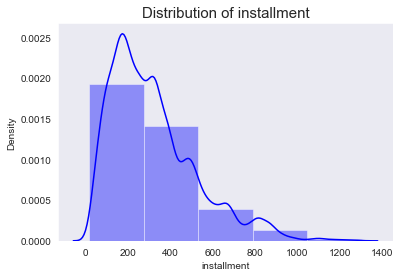

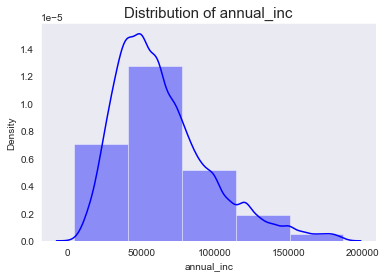

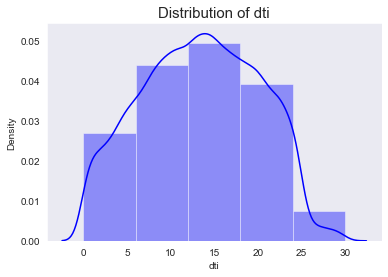

In [83]:
for col in cont_columns:
    sns.distplot(df[col], bins = 5, color = 'blue')
    plt.title("Distribution of "+col, fontsize=15)
    plt.show()

#### Pie-Chart


In [84]:
df['verification_status'].value_counts()

Verified        21278
Not Verified    16529
Name: verification_status, dtype: int64

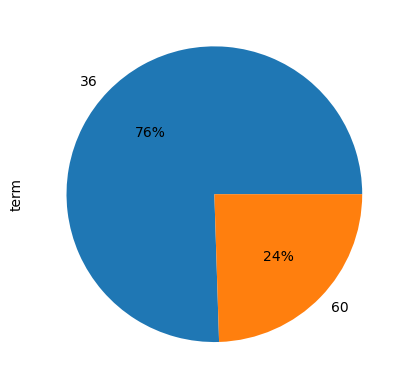

----------------------


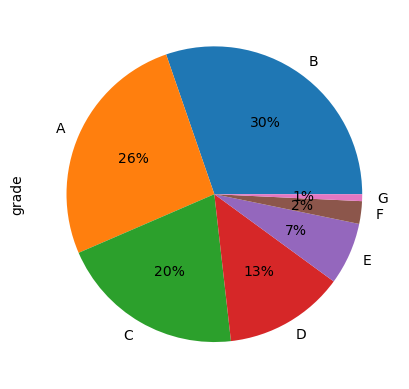

----------------------


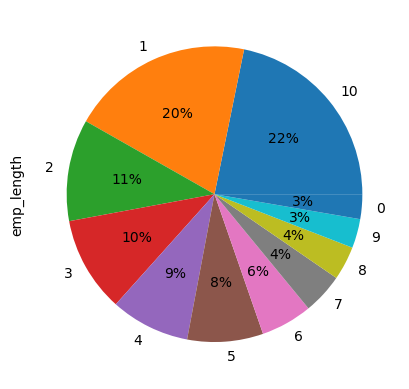

----------------------


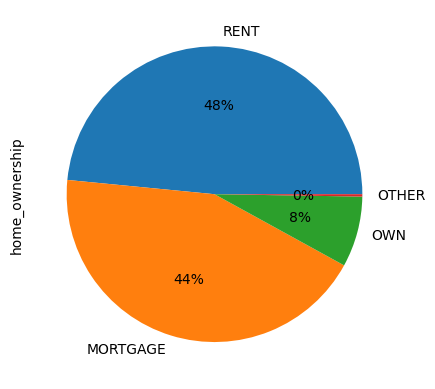

----------------------


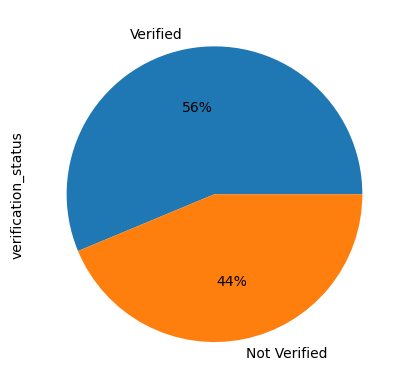

----------------------


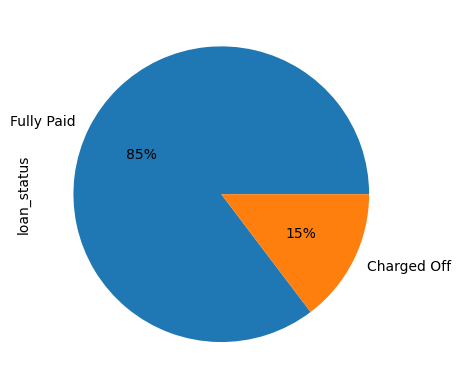

----------------------


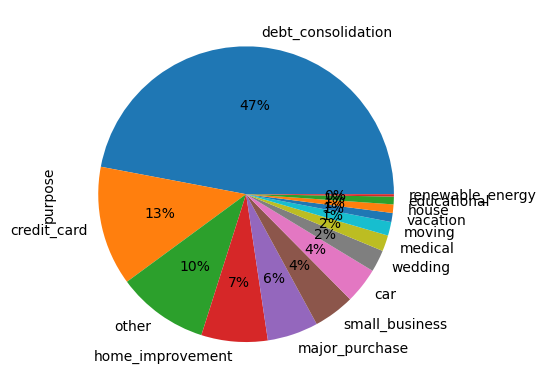

----------------------


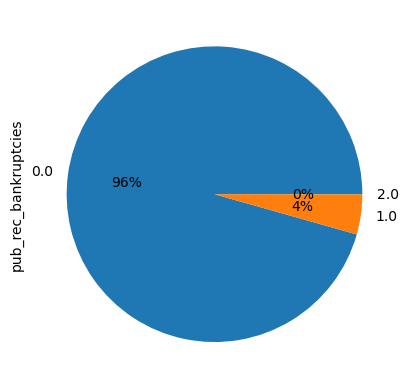

----------------------


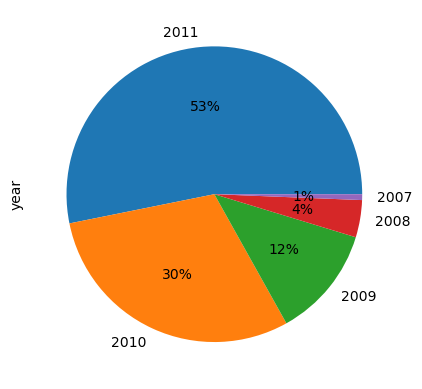

----------------------


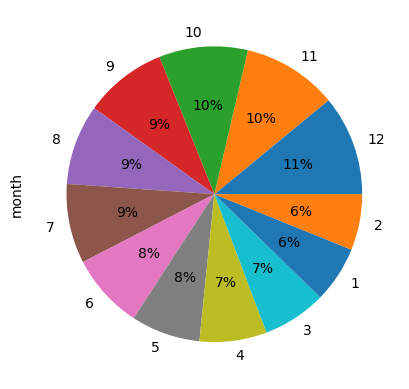

----------------------


In [85]:
#Plot a pie chart
cat_col = ['term', 'grade', 'emp_length', 'home_ownership','verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies', 'year', 'month']

plt.style.use("default")
for col in cat_col:
    df[col].value_counts().plot.pie(autopct='%1.0f%%')
    plt.show()
    print('----------------------')





### Categorical data observation: 
1. 76% of loans are 36 months term and 24% loans are 60 months term
2. Loan applicants contribution  are Grade A (30%),  Grade B(26%), Grade C (20%)  
3. 22% of employees are 10+ years and 20% employees are 1 year.
4. 49% of loan applicants has rented home and 43% is mortgage
5. 56% of source has been verified and 44% is not verified
6. 85% of loan is fullu paid and 15% of loan is charged off.
7. 47% of purpose is dept consolidation and 13% is for credit card
8. Given data set, 53% of loan provided on year 2011 and 30% of loan provided on 2010
9. No of load applied is slightly high on Oct, Nov and Dec


### Segmented univariate analysis

In [86]:
# Segmented univariate analysis. Analyse every category column based on loan status.
for col in category_col:
    d=(df.groupby(col).loan_status.value_counts(1)*100).unstack()
    d['Tot_entries']=df[col].value_counts()
    
    print(d)
    print('----------------------')


loan_status  Charged Off  Fully Paid  Tot_entries
term                                             
36                 11.15       88.85        28548
60                 25.54       74.46         9259
----------------------
loan_status  Charged Off  Fully Paid  Tot_entries
grade                                            
A                   6.06       93.94         9905
B                  12.26       87.74        11452
C                  17.43       82.57         7676
D                  22.21       77.79         4976
E                  27.03       72.97         2579
F                  32.94       67.06          935
G                  34.15       65.85          284
----------------------
loan_status  Charged Off  Fully Paid  Tot_entries
sub_grade                                        
A1                  2.67       97.33         1124
A2                  4.97       95.03         1490
A3                  5.77       94.23         1786
A4                  6.28       93.72         2833
A5  

loan_status  Charged Off  Fully Paid  Tot_entries
month                                            
1                  13.56       86.44         2331
2                  12.40       87.60         2315
3                  12.97       87.03         2637
4                  13.13       86.87         2780
5                  16.12       83.88         2860
6                  15.30       84.70         3112
7                  14.32       85.68         3288
8                  13.98       86.02         3320
9                  15.85       84.15         3420
10                 15.37       84.63         3669
11                 14.99       85.01         3930
12                 16.21       83.79         4145
----------------------


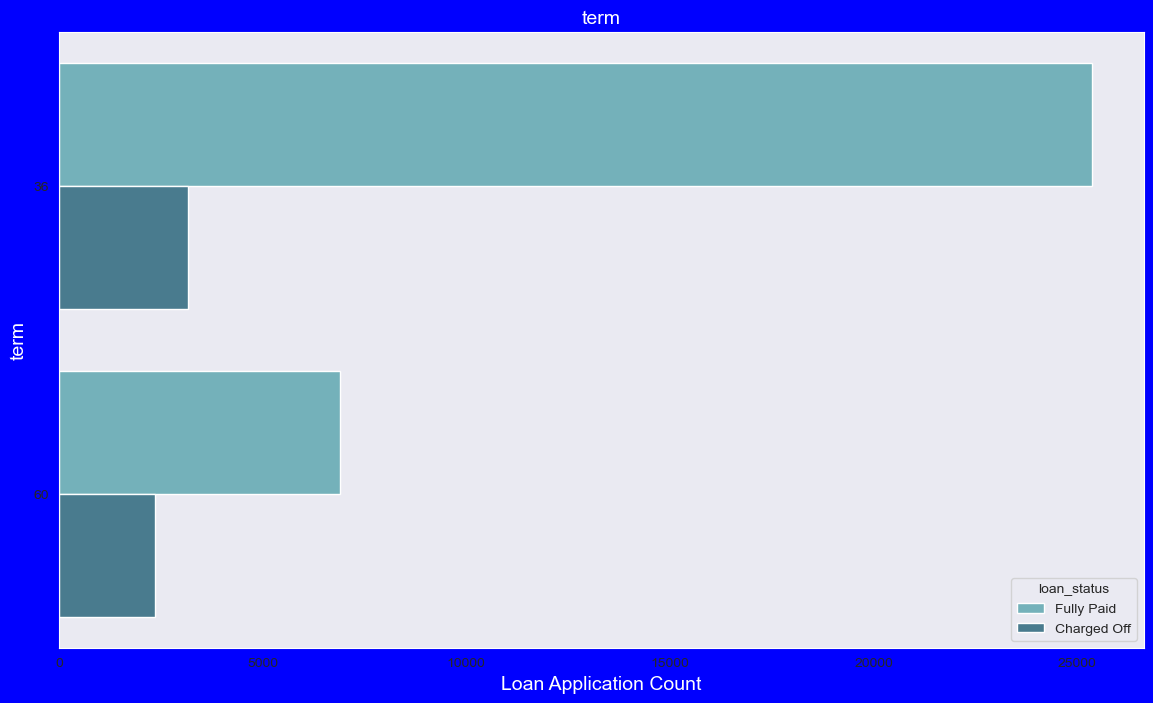

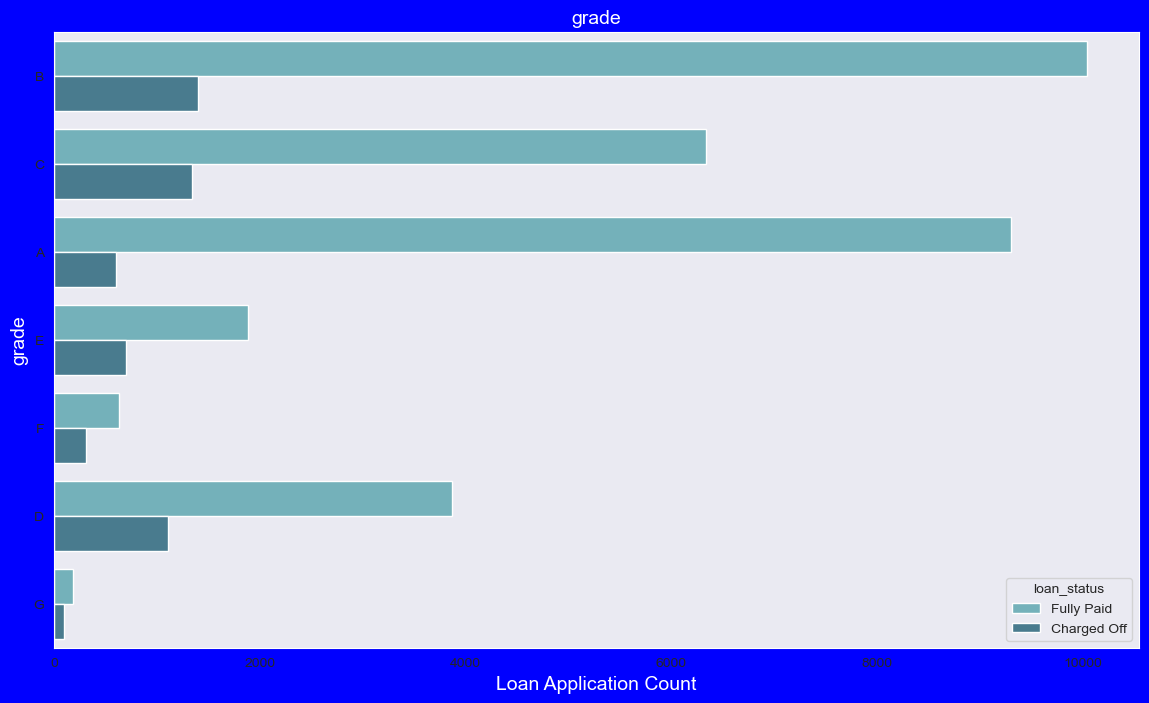

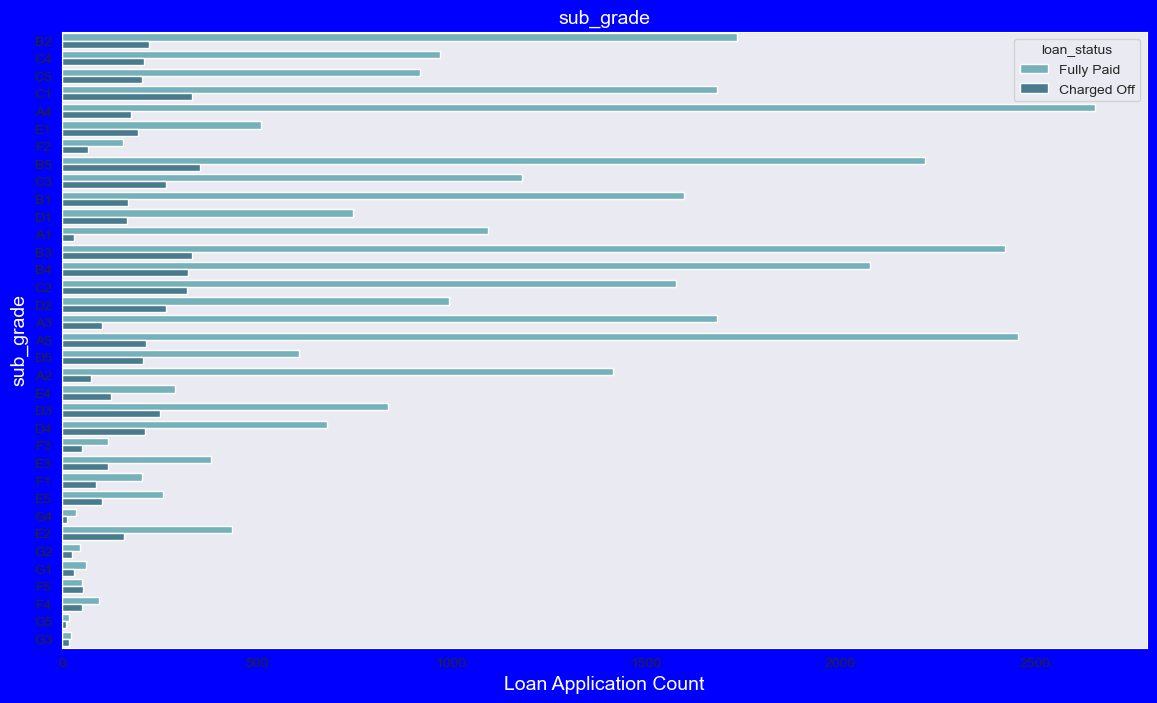

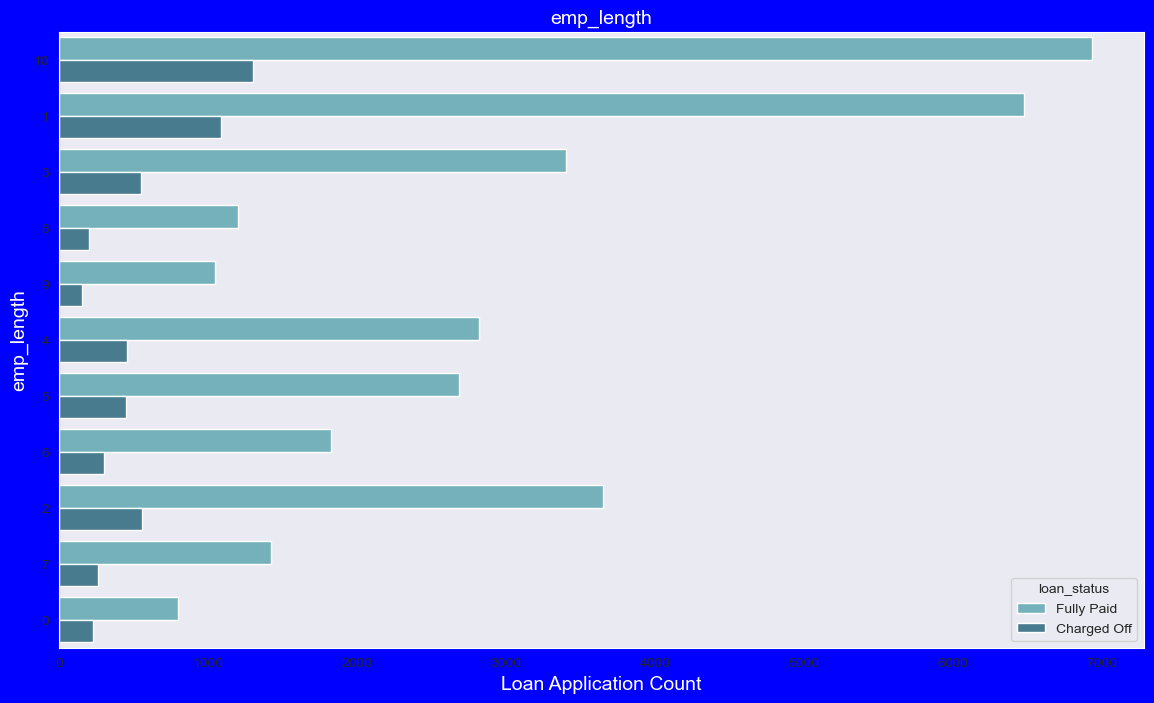

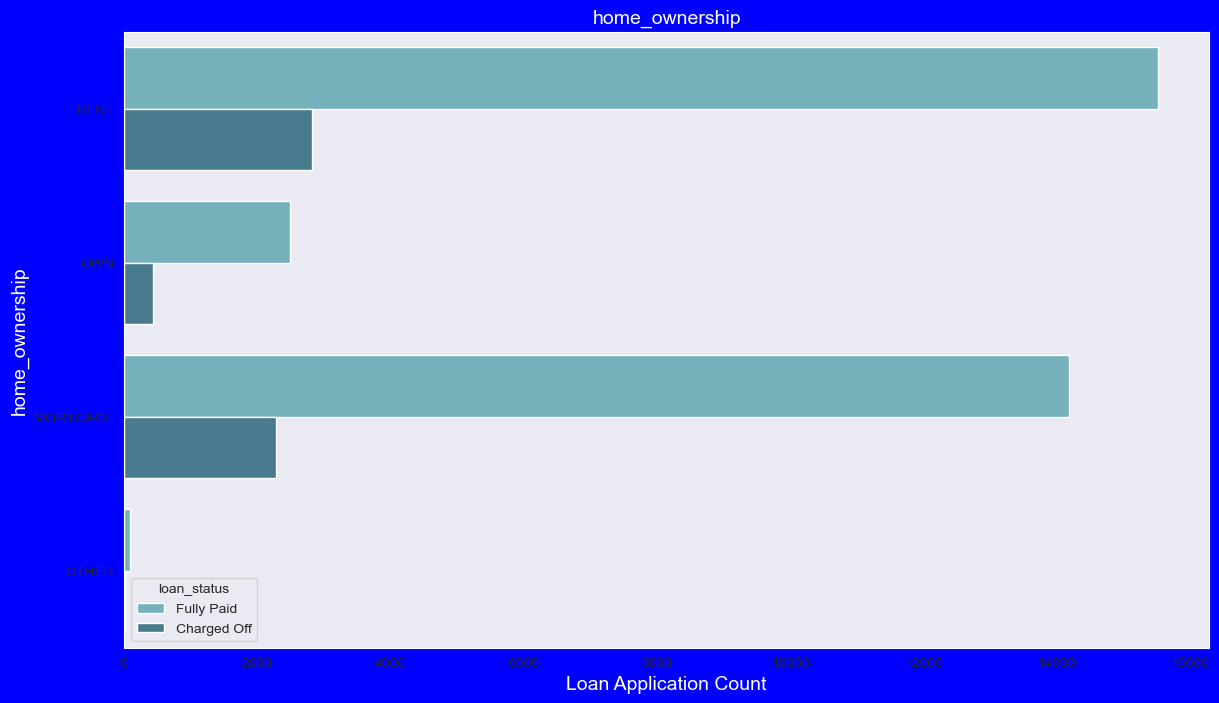

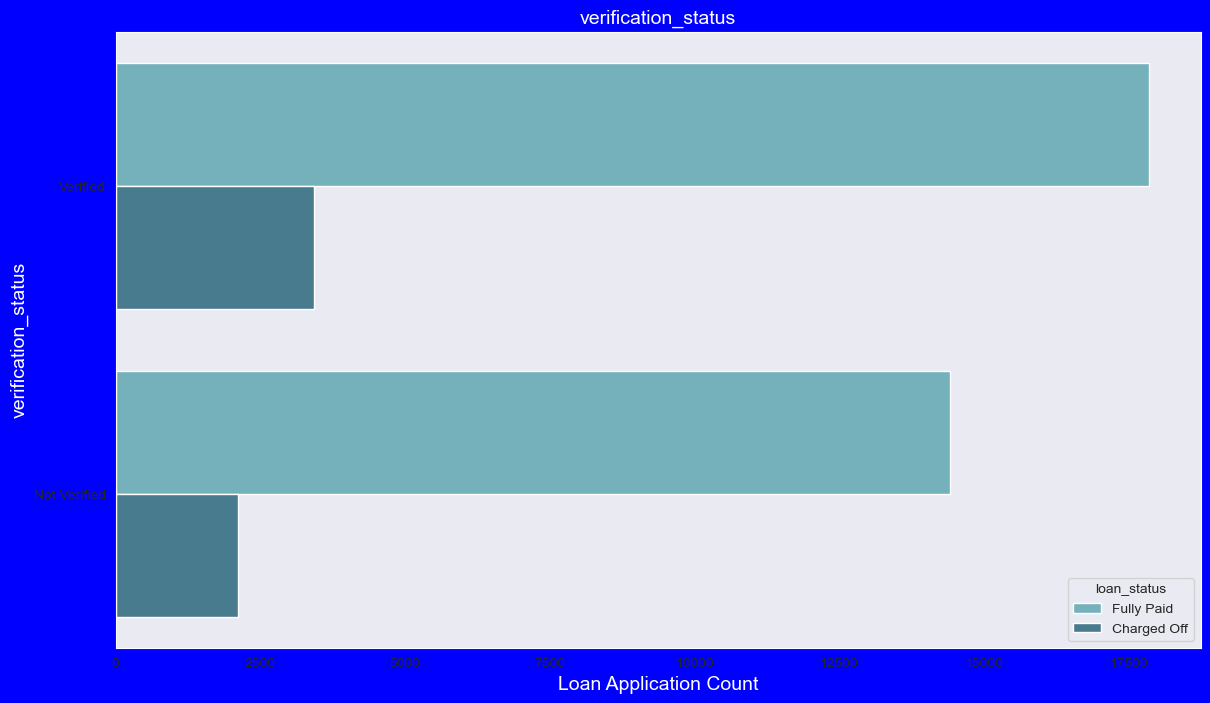

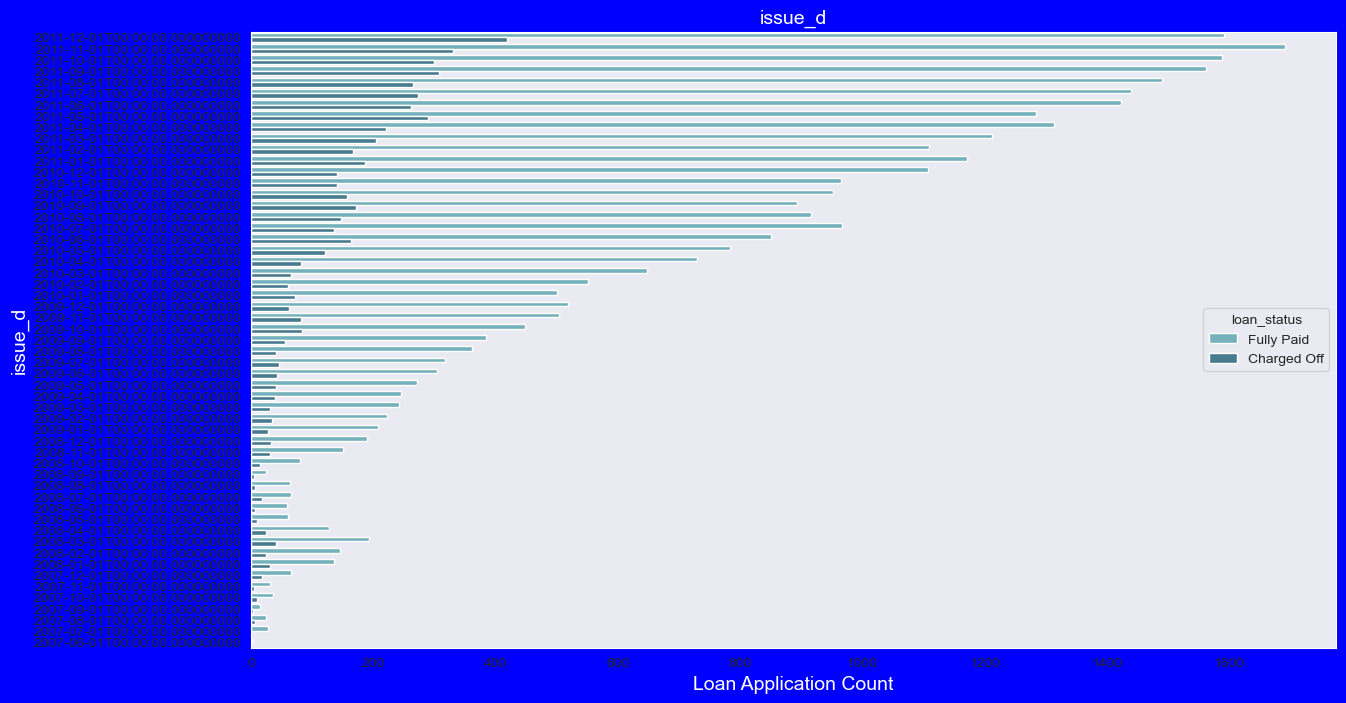

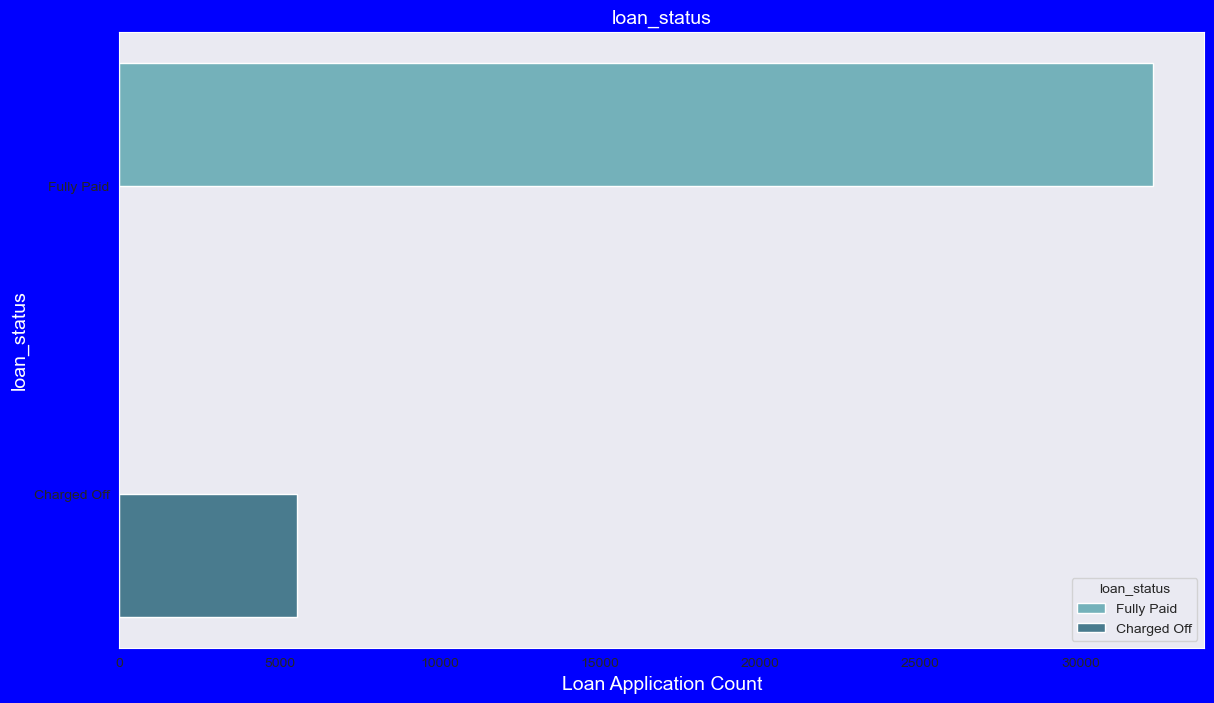

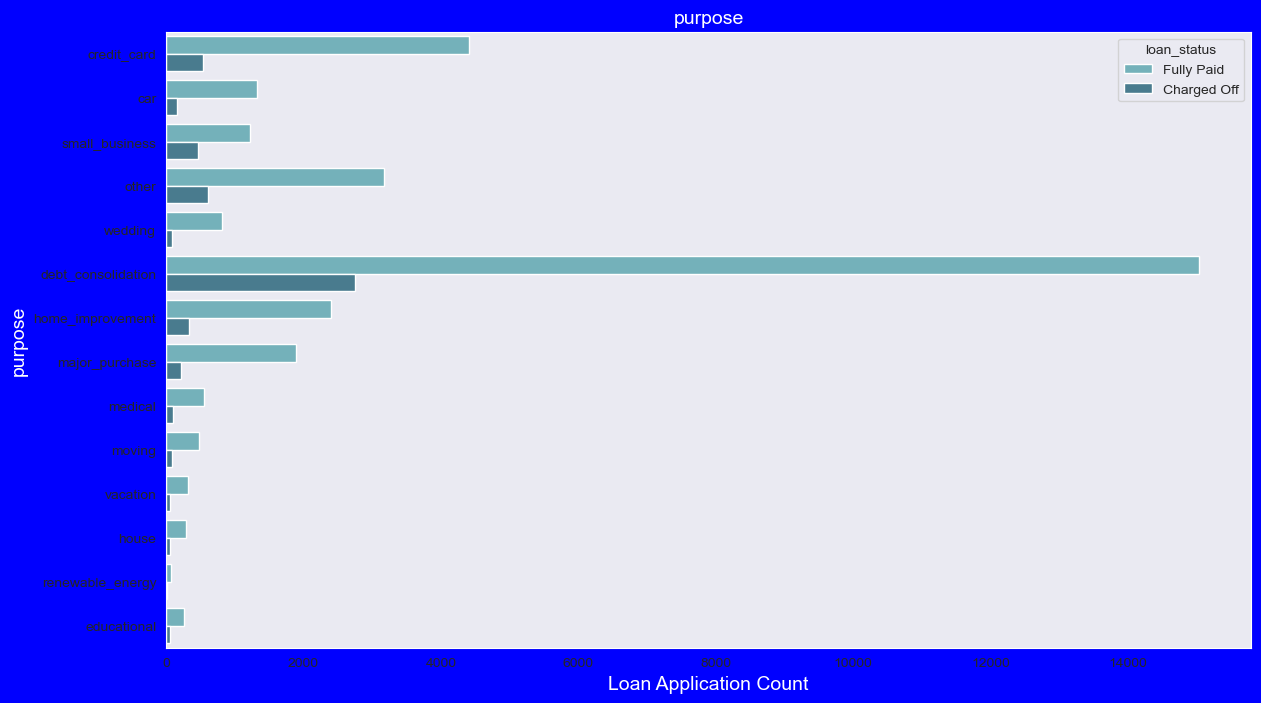

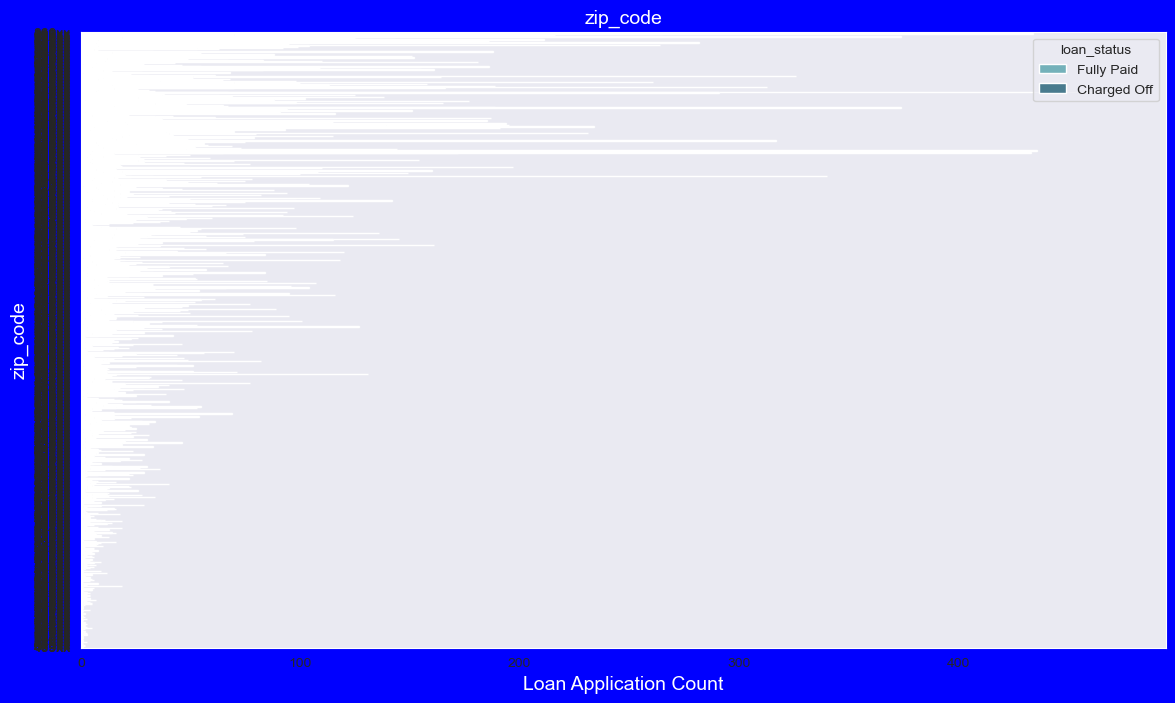

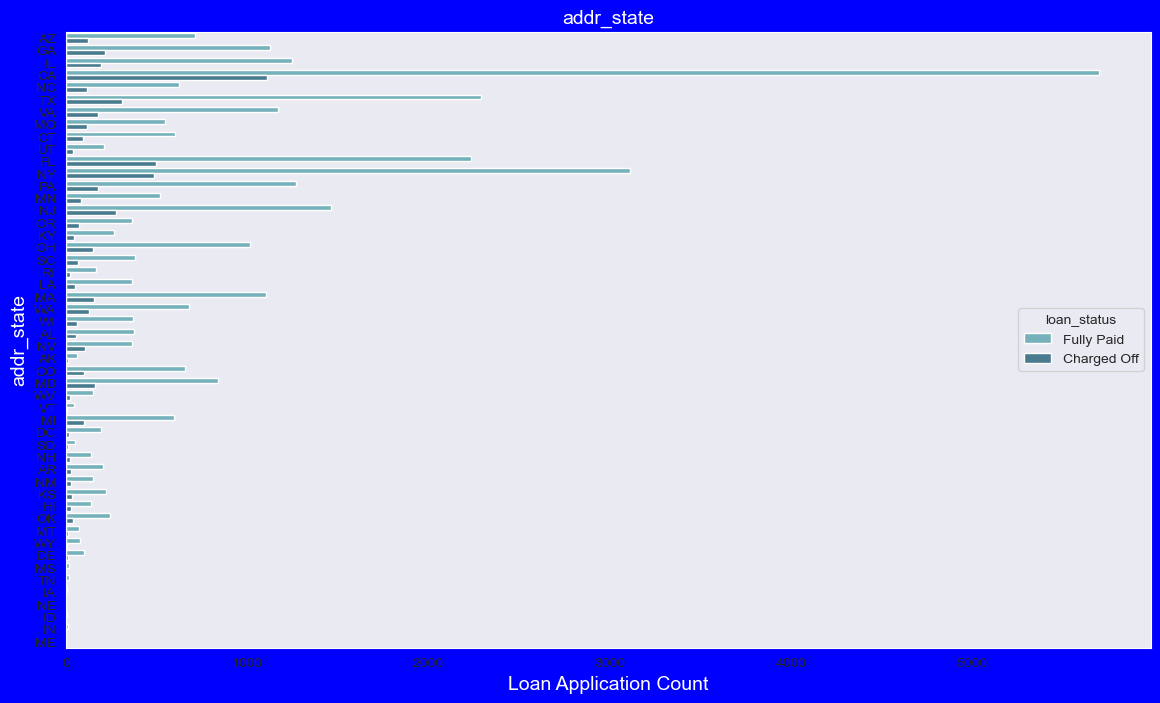

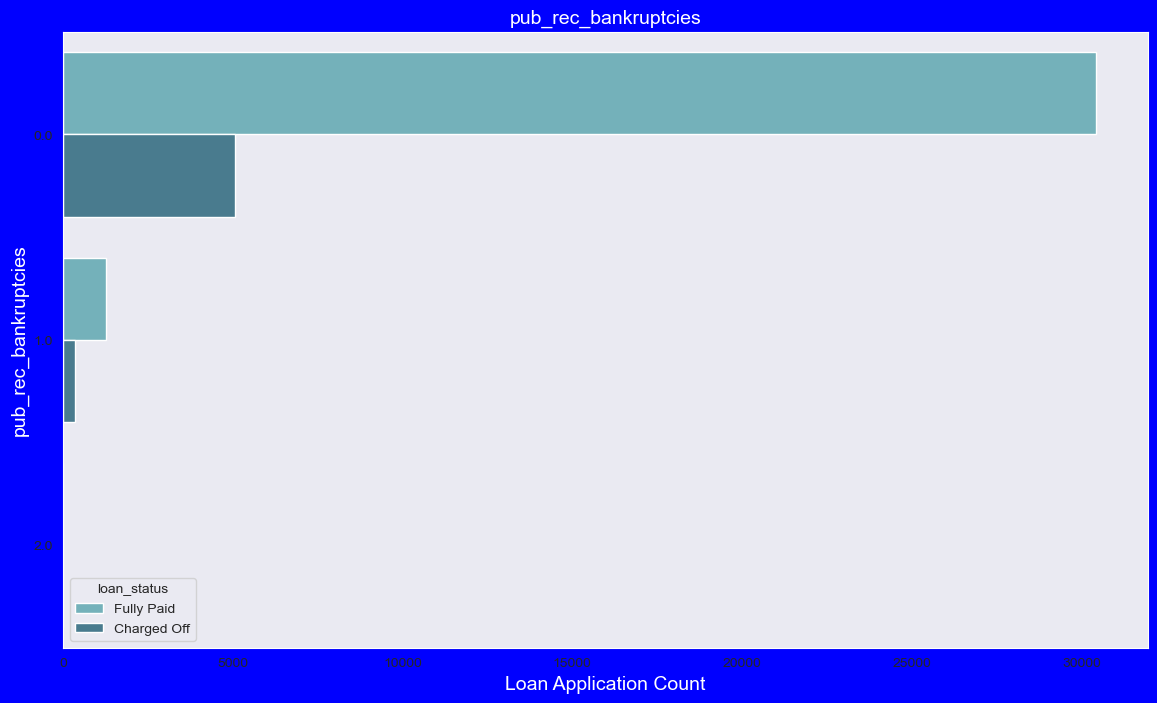

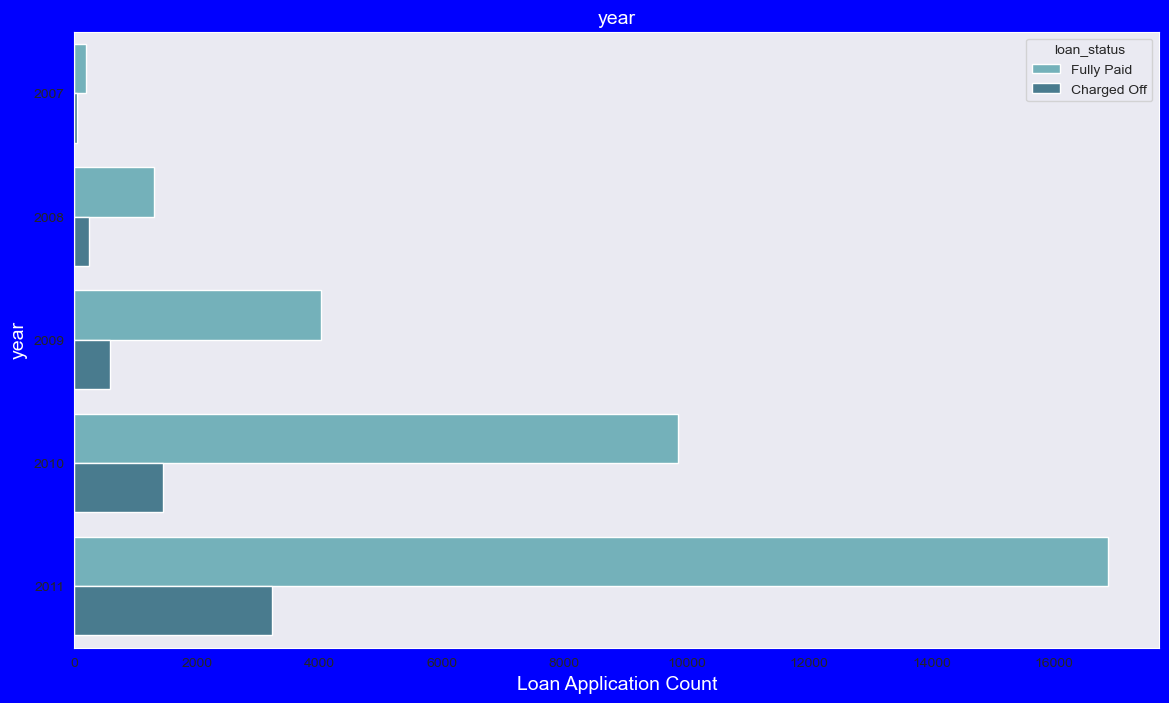

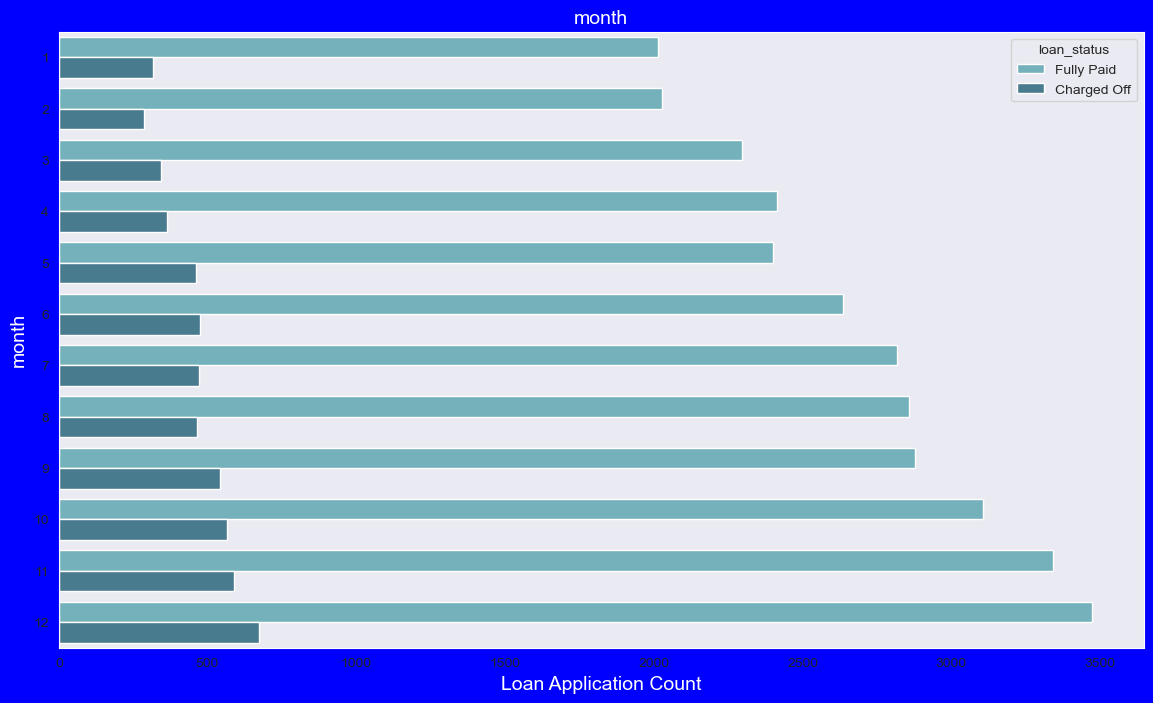

In [87]:

for col in category_col:
    plt.figure(figsize=(14,8),facecolor='b')
    sns.set_style("dark")
    ax = sns.countplot(y=col,data=df,hue='loan_status',palette='GnBu_d')
    ax.set_title(col,fontsize=14,color='w')
    ax.set_ylabel(col,fontsize=14,color = 'w')
    ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
    plt.show()


In [88]:
cat_col = category_col.copy()
cat_col.remove('issue_d')
cat_col.remove('zip_code')
category_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'pub_rec_bankruptcies',
 'year',
 'month']

### Segmented variate analysis Observation:
1. 60 months term charged off is 25% compare with 36 months term which is 11%. Prefer term is 36 months.
2. Lower grade charge off rate is way high than higher grade.Charge off for  Grade E (27%), F (33%) and G(35%) , how ever Grade A (6%), B(12%), C(17%), D (22%)
3. Sub grade: sub grade is aligning with Grade behaviour. Charge off percentage is in ascending order from A1 to F5. Slight diffrence behaviour on G1 to G5 grade. However number of records contributed to G subgrade is way lower than other grades. we can ignore subgrade G*.
4. Not much variant in charge_off percentage based on Emp_length 
5. Not much variant in charge_off percentage based on home_ownership 
6. verification status - verified is just 3% higher than non_verified - no major variance
7. purpose - High charge off percentage. small_business (28%). renewable_energy  (19%)     educational  (17%)
8. addr_state   NE state has high charge off rate - 60%. However only 5 records contributed. So Ignoring.
9. pub_rec_bankruptcies 2 , charge off is 40% which is high . pub_rec_bankruptcies 1 is 22% pub_rec_bankruptcies 0 is 14%
10. No of loans applied on sep, Oct, nov, dev month is high compare to other months.                                  

### Bivariate Analysis

In [89]:
#converting dti into a categorical variable for easier analysis
df['dti_slab'] = pd.cut(df.dti, bins=6,precision =0)
#converting funded_amnt_inv into a categorical variable for easier analysis
df['funded_amnt_slab'] = pd.cut(df.funded_amnt_inv, bins=7,precision =0)
#converting int_rate into a categorical variable for easier analysis
df['int_rate_slab']=pd.cut(df.int_rate, bins=4,precision =0)
#creating a new column to convert annual income to a categorical variable.
df['income_slab'] = pd.cut(df['annual_inc'], bins=10,precision=0)

In [90]:
#to find the default rate easily, a new column' add_value' is added to the dataframe. This has integer value 1 for charged off and 0 for fully paid.
def add_value(status):
    if status == 'Charged Off':
        return 1
    if status == 'Fully Paid':
        return 0
df['value']=df['loan_status'].apply(add_value)

In [91]:
#performing bivariate analysis.First all combinations are checked using a for loop.Then for the bivariate combinations for which default rate is more than 40% is picked up for further analysis.
import numpy as np
l=['emp_length','grade','home_ownership','pub_rec_bankruptcies','term','purpose','verification_status','month','dti_slab','funded_amnt_slab','int_rate_slab','income_slab']
len(l)
t=[]
dfl=[]
for i in l:
    for j in l[l.index(i)+1:]:
        if(i==j):
            continue
        k=df.groupby([i,j])['value'].mean().unstack()
        if ((k[max(k)].max()>=0.3) & (k[max(k)].max()!=np.nan)):
            print(k)
            dfl.append(k)
            

grade         A    B    C    D    E    F    G
emp_length                                   
0          0.11 0.22 0.36 0.31 0.37 0.35 1.00
1          0.07 0.13 0.16 0.21 0.26 0.30 0.48
10         0.06 0.13 0.19 0.25 0.27 0.39 0.36
2          0.05 0.11 0.16 0.20 0.27 0.31 0.18
3          0.06 0.10 0.16 0.24 0.27 0.27 0.37
4          0.05 0.12 0.14 0.20 0.27 0.34 0.33
5          0.06 0.12 0.19 0.21 0.26 0.28 0.33
6          0.05 0.12 0.18 0.22 0.26 0.33 0.36
7          0.04 0.15 0.19 0.19 0.31 0.41 0.22
8          0.05 0.13 0.17 0.23 0.31 0.18 0.27
9          0.06 0.09 0.17 0.20 0.25 0.44 0.08
pub_rec_bankruptcies  0.00  1.00  2.00
emp_length                            
0                     0.21  0.29   NaN
1                     0.14  0.24  0.00
10                    0.15  0.22  0.00
2                     0.13  0.18   NaN
3                     0.13  0.31   NaN
4                     0.13  0.22   NaN
5                     0.14  0.28   NaN
6                     0.14  0.12  1.00
7           

income_slab  (3817.0, 22300.0]  (22300.0, 40600.0]  (40600.0, 58900.0]  \
grade                                                                    
A                         0.12                0.09                0.07   
B                         0.17                0.16                0.13   
C                         0.23                0.21                0.18   
D                         0.29                0.26                0.23   
E                         0.32                0.32                0.29   
F                         0.25                0.36                0.35   
G                         0.50                0.56                0.35   

income_slab  (58900.0, 77200.0]  (77200.0, 95500.0]  (95500.0, 113800.0]  \
grade                                                                      
A                          0.04                0.04                 0.03   
B                          0.11                0.10                 0.08   
C                          0.

int_rate_slab  (5.0, 10.0]  (10.0, 15.0]  (15.0, 20.0]  (20.0, 24.0]
term                                                                
36                    0.06          0.13          0.19          0.32
60                    0.12          0.22          0.29          0.39
dti_slab            (-0.0, 5.0]  (5.0, 10.0]  (10.0, 15.0]  (15.0, 20.0]  \
purpose                                                                    
car                        0.09         0.10          0.13          0.10   
credit_card                0.09         0.09          0.10          0.11   
debt_consolidation         0.13         0.13          0.15          0.17   
educational                0.25         0.09          0.14          0.14   
home_improvement           0.10         0.11          0.12          0.12   
house                      0.12         0.16          0.20          0.19   
major_purchase             0.09         0.09          0.11          0.12   
medical                    0.16         

int_rate_slab       (5.0, 10.0]  (10.0, 15.0]  (15.0, 20.0]  (20.0, 24.0]
funded_amnt_slab                                                         
(-35.0, 5000.0]            0.08          0.17          0.26          0.39
(5000.0, 10000.0]          0.06          0.14          0.23          0.40
(10000.0, 15000.0]         0.06          0.13          0.23          0.45
(15000.0, 20000.0]         0.05          0.15          0.27          0.37
(20000.0, 25000.0]         0.04          0.13          0.25          0.37
(25000.0, 30000.0]         0.04          0.14          0.20          0.31
(30000.0, 35000.0]         0.04          0.19          0.29          0.42
income_slab    (3817.0, 22300.0]  (22300.0, 40600.0]  (40600.0, 58900.0]  \
int_rate_slab                                                              
(5.0, 10.0]                 0.12                0.10                0.07   
(10.0, 15.0]                0.21                0.19                0.15   
(15.0, 20.0]                0.

### Bivariate Analysis:
Prerequisite:
Converted numical variable in to categorical dti, funded_amt, Interested_rate and income. Analyzed all possible combination of 'emp_length','grade','home_ownership','pub_rec_bankruptcies','term','purpose','verification_status','month','dti_slab','funded_amnt_slab','int_rate_slab','income_slab' where chargedoff rate is more than 30%. this has been achived via loop.
Observations: 
1.  funded_amnt_slab  (30000.0, 35000.0], emp_len = 6 years and charged off is 35%
2. [20.0, 24.0] interest slab has highest charged off rate
3. lower grade has high charged off percentage
4. Grade D and E charged off percentage is high for all months along with Grade F & G.
5. pub_rec_bankruptcies  = 1 and  home_ownership is OTHER and charge off percentage is 67%
6. int_rate slab (20.0, 24.0), home_ownership = OWN, RENT, charge off is very high 50%, 40%
7. funded_amnt_slab  (5000.0, 10000.0], pub_rec_bankruptcies  = 2.0, charge off is 50%
 funded_amnt_slab 30000.0, 35000.0 pub_rec_bankruptcies  = 2.0, charge off is 67%
8. dti_slab  10.0, 15.0 and purpose = renewable_energy, charge off percentage is 35.   
sladti_slab  25.0, 30.0 and purpose = renewable_energy, charge off percentage is 50.        
9. Purpose = small_business and funded_amnt_slab is [10000.0, 15000.0], [15000.0, 20000.0]  [20000.0, 25000.0] charged off is 30+ %
10. purpose = vacation, funded_amnt_slab =  [15000.0, 20000.0], charged off = 42%
11. purpose = medical,    
funded_amnt_slab =(15000.0, 20000.0], charged_off = 50%,  funded_amnt_slab = (30000.0, 35000.0] charged_off = 67%
12. purpose = small_business  funded_amnt_slab =  (30000.0, 35000.0]  , charged_off = 46%,  
13. int_rate_slab       (15.0, 20.0] and (20.0, 24.0], purpose =  small_business  ,  educational   , house , medical, moving , charge off percentage is more than 35% 
14. funded_amnt_slab  (30000.0, 35000.0] , november and december, charge off is more than 35% 
15. int_rate_slab is  20.0, 24.0, from 7th month to 12th month, charge off is more than 35% 
16. funded_amnt_slab  (30000.0, 35000.0], dti_slab                              (25.0, 30.0],  (15.0, 20.0]  (20.0, 25.0]  , charge off is more than 30%
17. int_rate_slab  (20.0, 24.0], all dti slab, charge off rate is more than 40%
          






<AxesSubplot:xlabel='purpose'>

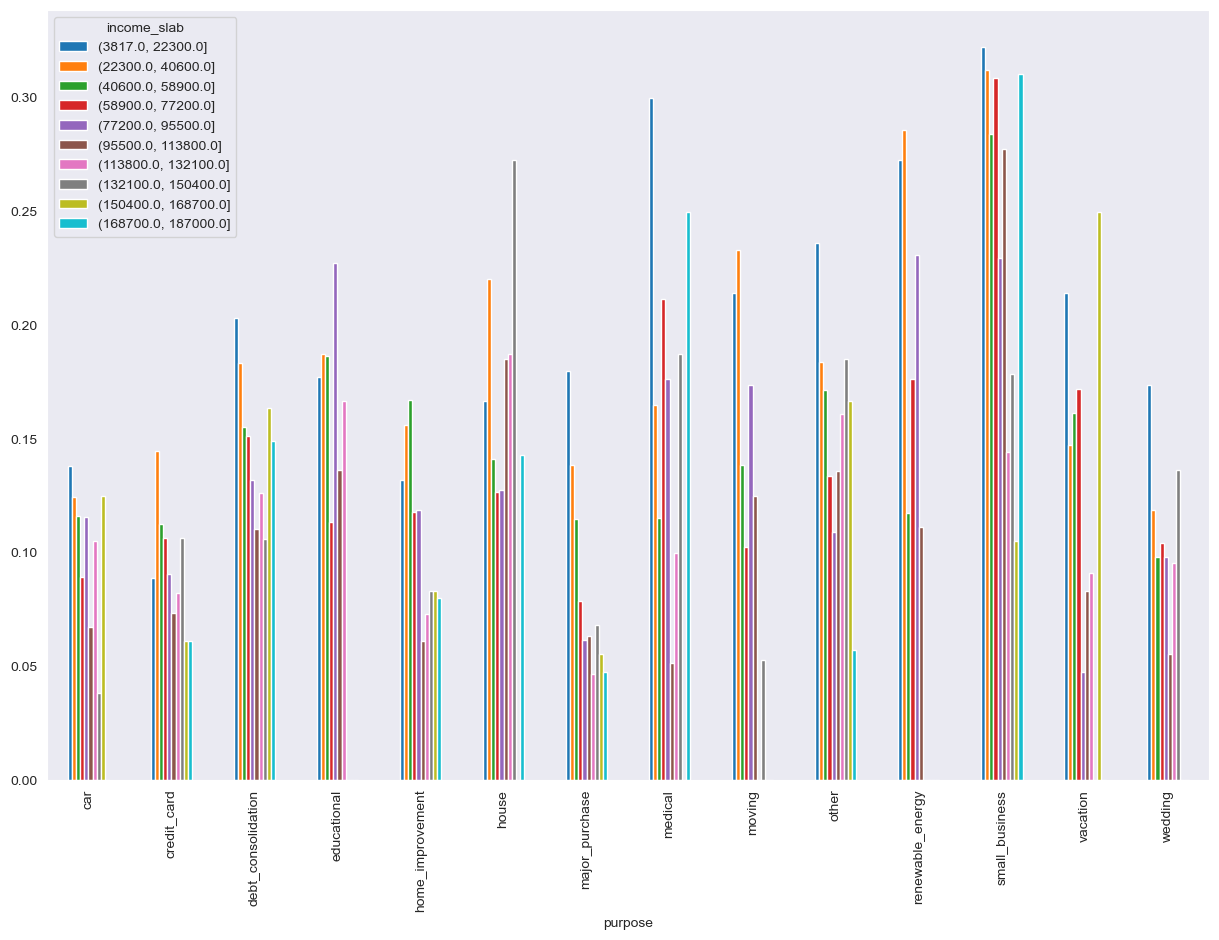

In [92]:
df.groupby(['purpose','income_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
# observation: 
#small business has more than 30% of charge off for most of the income slab. 
# medical has near 30% of charge offfor income slab 3000 to 22300.

<AxesSubplot:xlabel='income_slab'>

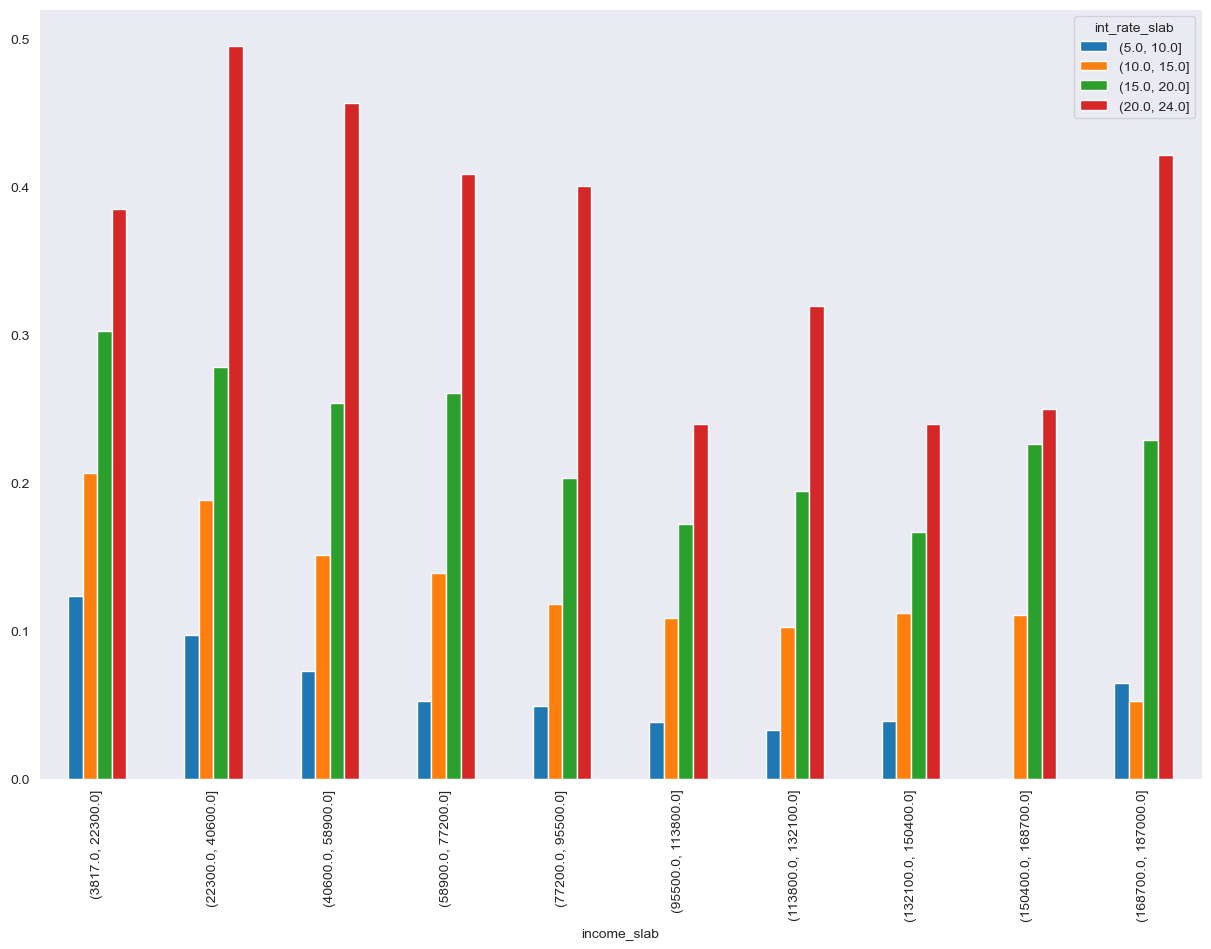

In [93]:
df.groupby(['income_slab','int_rate_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation int_rate slab 20 to 24, charge off is highest across all income_slab
#int rate slab 5 to 10, charge off percentage is low across all income_slab. when income increases charge off decreses for 5 to 20 slab.

<AxesSubplot:xlabel='income_slab'>

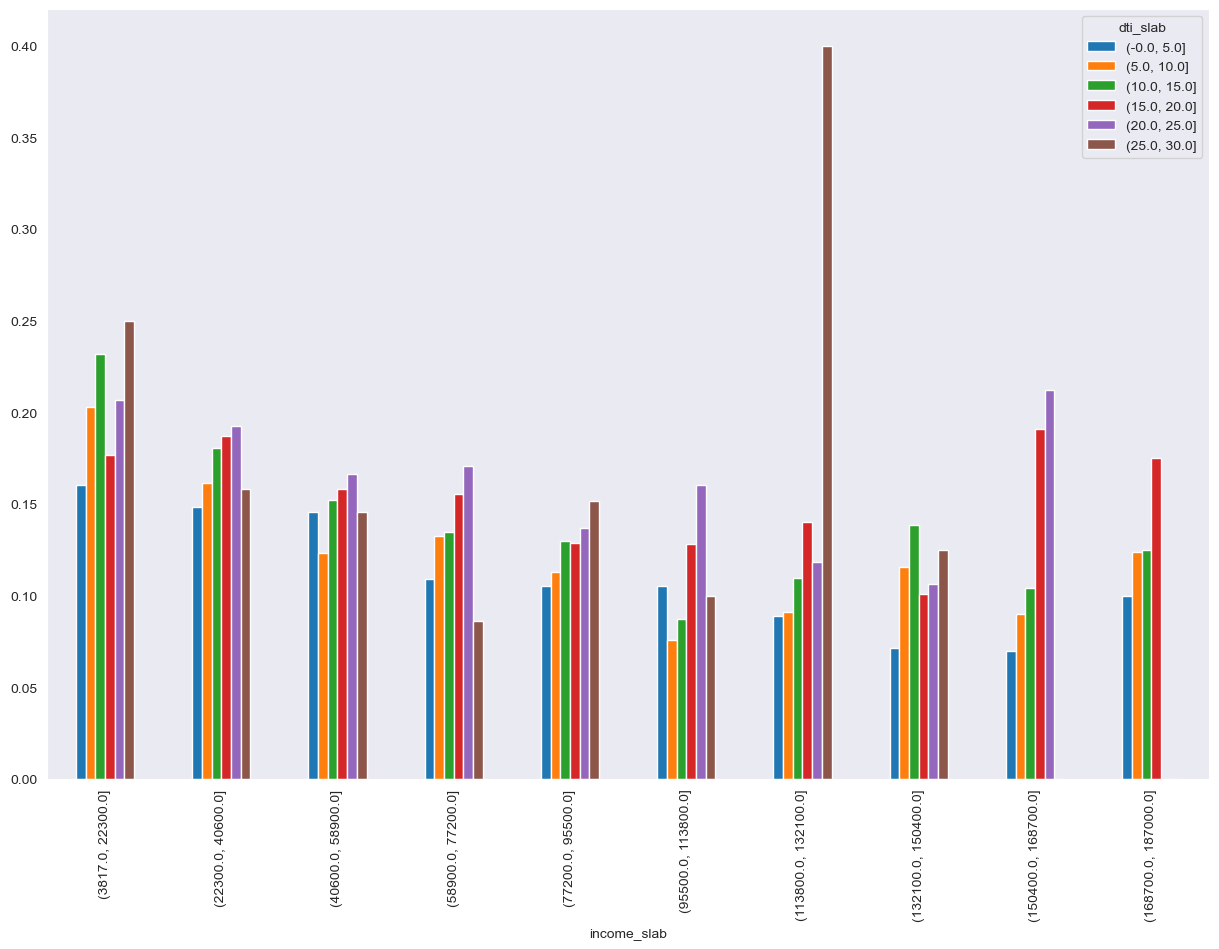

In [94]:
df.groupby(['income_slab','dti_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation dti_slab 25 to 30, income slab 113800 to 132100, charge off is 40+%


<AxesSubplot:xlabel='emp_length'>

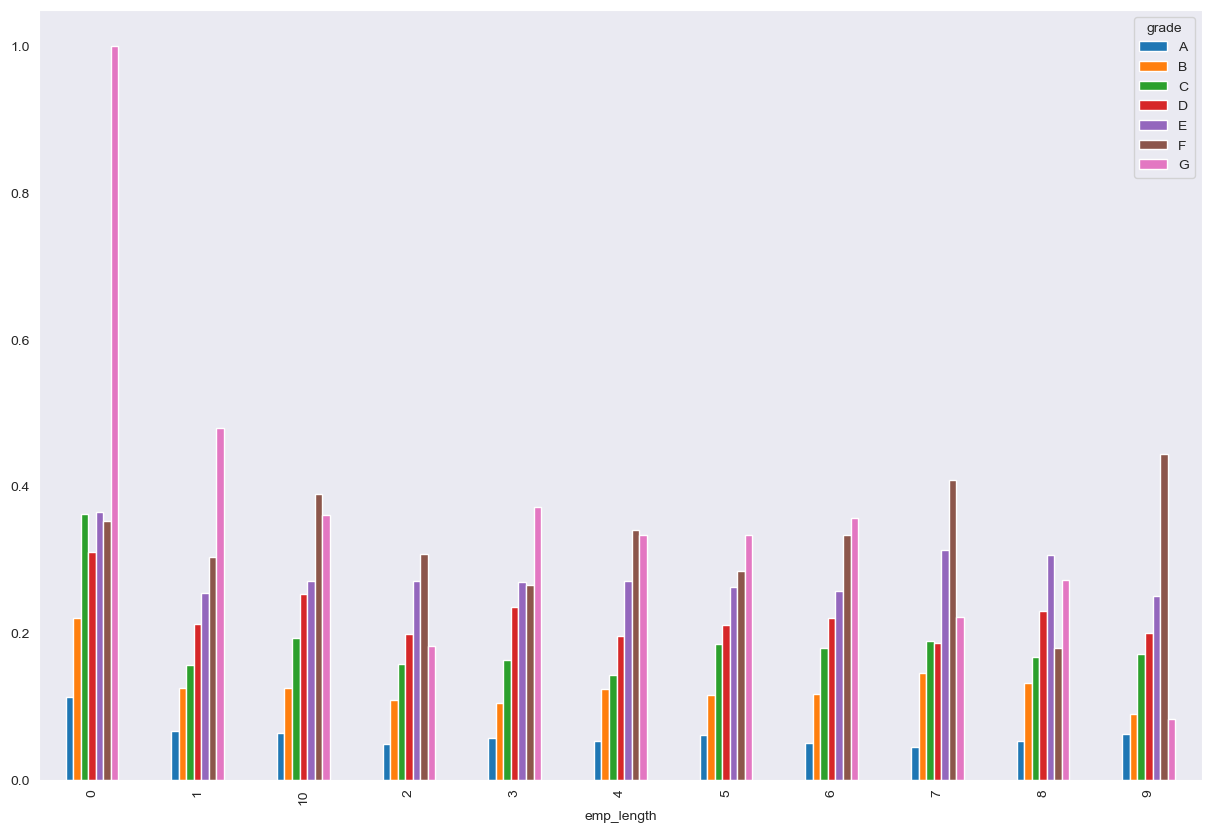

In [95]:
df.groupby(['emp_length','grade'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='emp_length'>

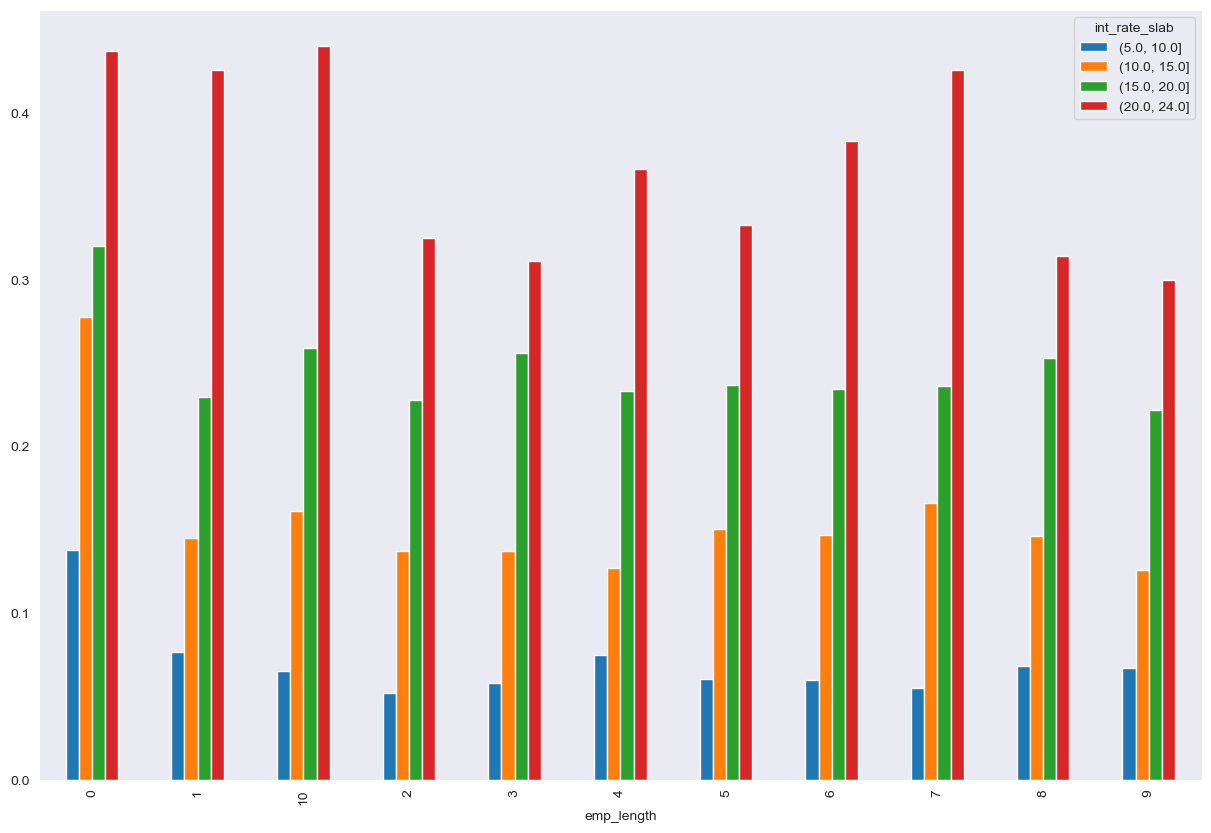

In [96]:
df.groupby(['emp_length','int_rate_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation int_rate 20 to 24 slab has more than 35% of charge off regardless of employee experience

<AxesSubplot:xlabel='home_ownership'>

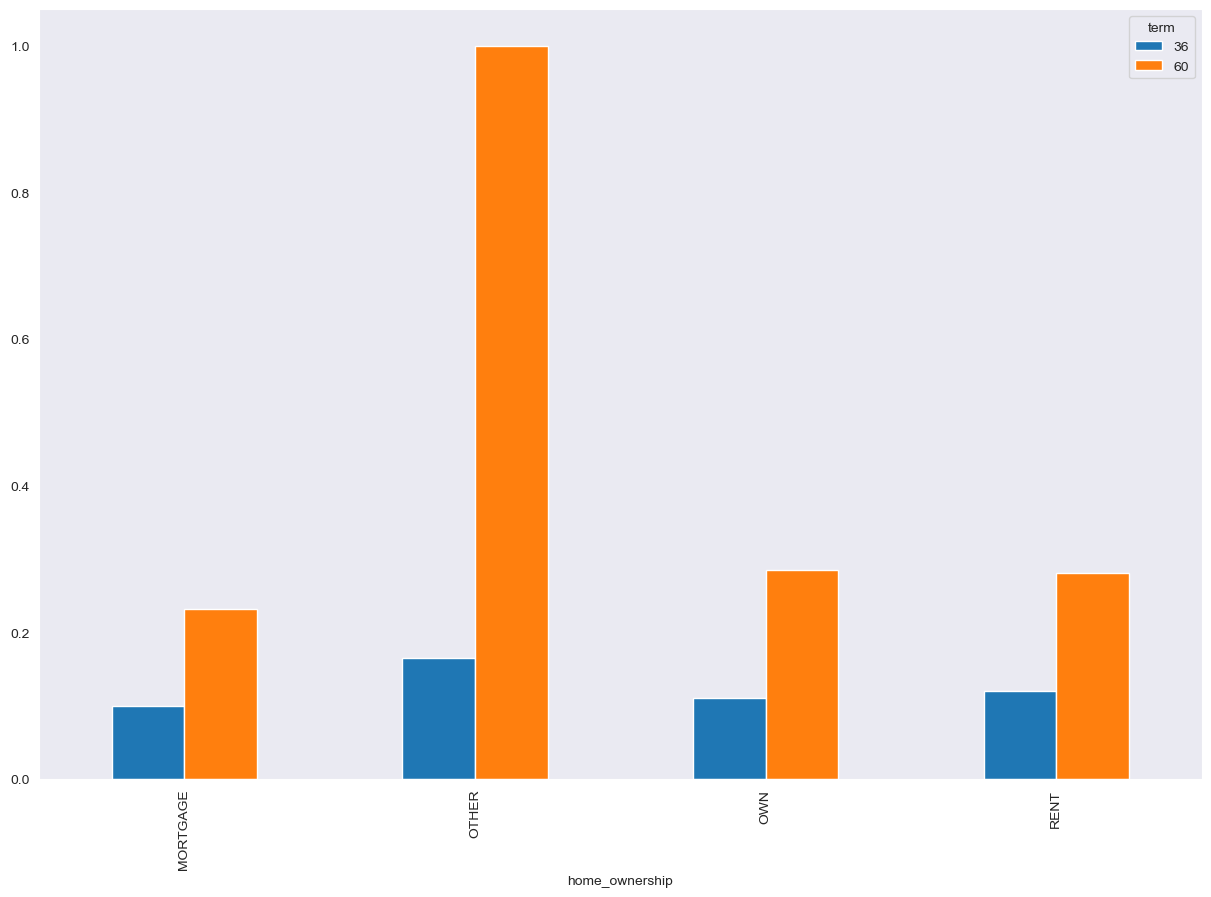

In [97]:
df.groupby(['home_ownership','term'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation term 60 months, home_ownership=other, charge off rate is very high

<AxesSubplot:xlabel='pub_rec_bankruptcies'>

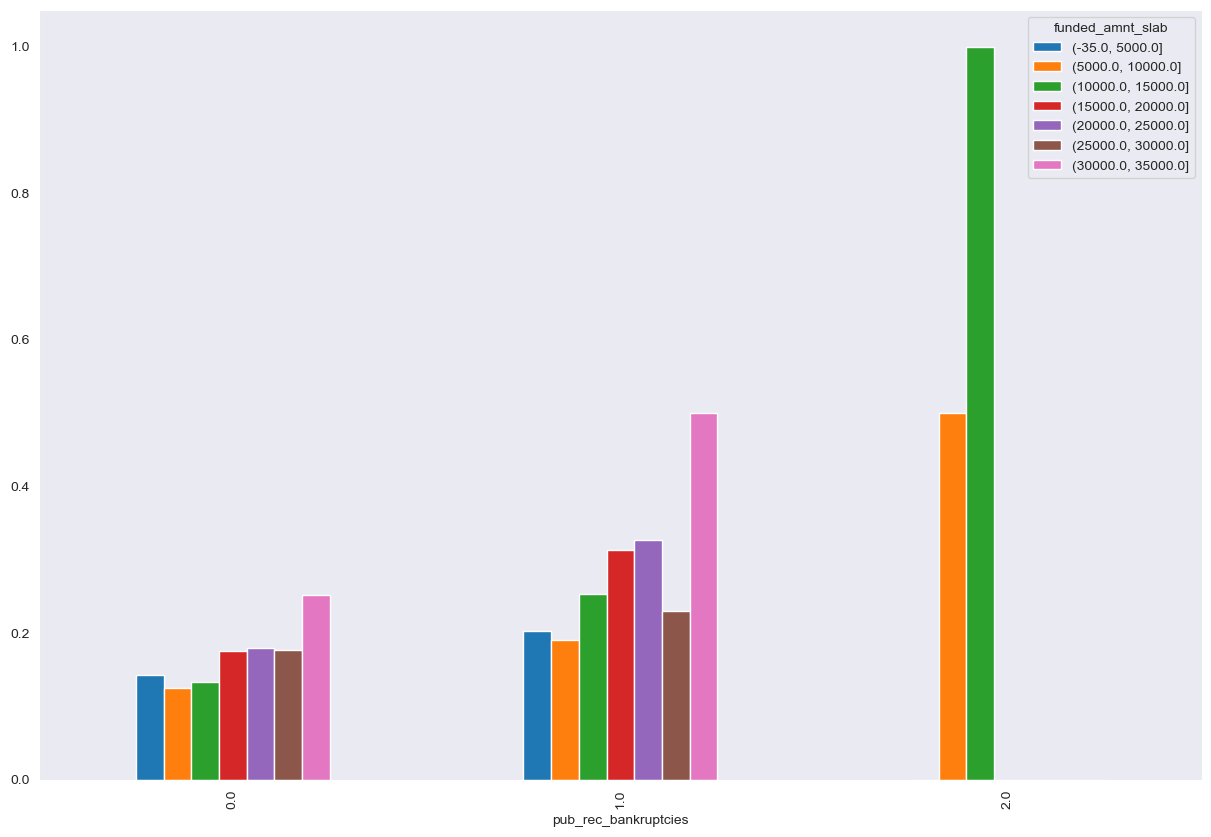

In [98]:
df.groupby(['pub_rec_bankruptcies','funded_amnt_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation higher slab of funded amount , bankrupcy = 1.0, charge off percentage is 45  
#10k to 15kof funded amount , bankrupcy = 2.0, charge off percentage is 90+

<AxesSubplot:xlabel='purpose'>

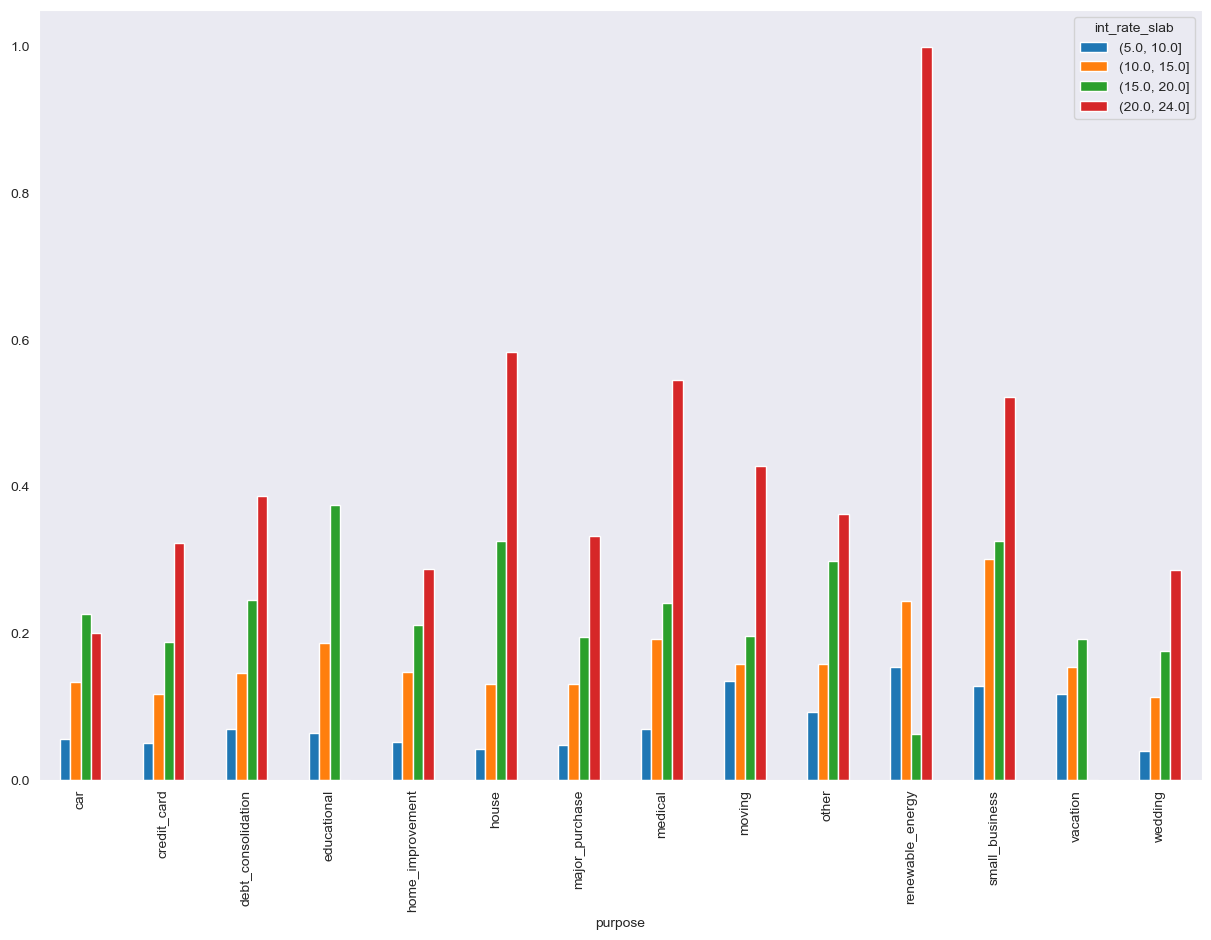

In [99]:
df.groupby(['purpose','int_rate_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
# Observation int_rate_slab 20 to 24 int_rate slab, renewable energy purpose, charge off rate is 95+%
# High interest slab charge off rate is high. lending club are on track to identify person is likely to default and provided higher interest rates.


In [ ]:
df.groupby(['purpose','funded_amnt_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#Observation purpose medical, funded_amt = 30k to 35k, charge off rate is >65%
#purpose medical, funded_amt = 25k to 30k, charge off rate is >45%
#purpose wedding , charge off rate is more than 30% for 30k to 35k fund amount.
#purpose vacation, charge off rate is more than 30% for 15k to 20k fund amount.

<AxesSubplot:xlabel='purpose'>

In [ ]:
df.groupby(['purpose','dti_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#observation renewable energy purpose, dti_slab 25 to 30, charge off is 50%
#across all dti slab, small business charge off is more than 25%

In [ ]:
df.groupby(['income_slab','funded_amnt_slab'])['value'].mean().unstack().plot(kind='bar',figsize=(15,10))
#observation funded_amt_slab :  30 to 35k, income slab 40 to 60k, charge off is 50%
#income slab increases, requested funded amount is decreasing. 